# The Sparks Foundation - Internship
### Data Science and Business Analytics

## Sidharth S N

Task 5: Explore the dataset of IPL and find out the most successful teams, players and factors contributing win or loss of a team. And suggest teams or players a company should endorse for it's products.

***

Importing all the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***

Getting the datasets

In [2]:
# we have 2 datasets to explore
deliver = pd.read_csv('deliveries.csv')
match = pd.read_csv('matches.csv')

In [3]:
deliver.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [4]:
match.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
# Merging the 2 datasets together with match_id and id
data = pd.merge(deliver, match, left_on = 'match_id', right_on = 'id')

In [6]:
data.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN


In [7]:
# Dropping the 'id' column because it's same as 'match_id'
data.drop('id', axis = 1, inplace = True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179078 entries, 0 to 179077
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

***

Visualising the dataset

Team with most number of wins

In [9]:
# Let's look at teams
winner_team = data['winner'].value_counts().sort_values(ascending = False)

Text(0, 0.5, 'Number of wins')

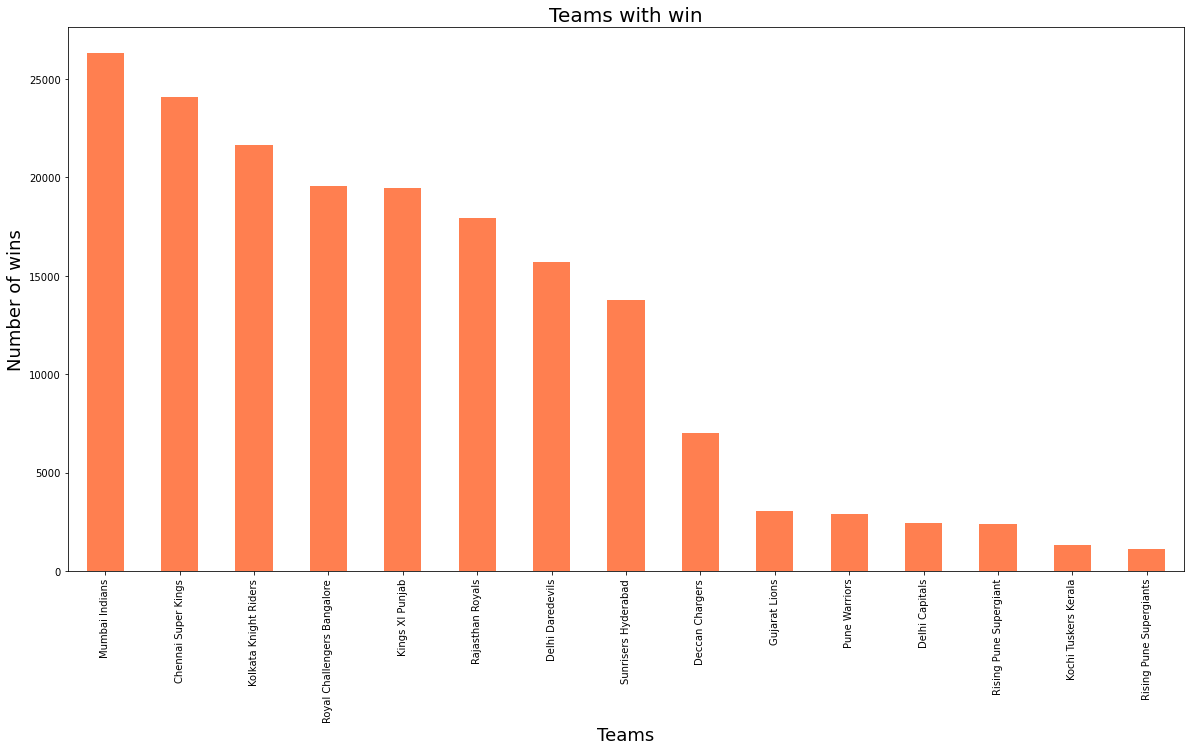

In [10]:
winner_team.plot(kind = 'bar', figsize = (20,10), color = 'coral')
plt.title('Teams with win', fontsize = 20)
plt.xlabel('Teams', fontsize = 18)
plt.ylabel('Number of wins', fontsize = 18)

From the above plot we can say that 'Mumbai Indians' is the team with most wins and followed by 'Chennai super Kings' 

In [11]:
winner_team.tail()

Pune Warriors              2883
Delhi Capitals             2436
Rising Pune Supergiant     2383
Kochi Tuskers Kerala       1322
Rising Pune Supergiants    1105
Name: winner, dtype: int64

As we can see that 'Rising Pune Supergiants' has won the least number of matches

Player with most wins

In [12]:
# Let's look at top 20 players
player_won = data['player_of_match'].value_counts().sort_values(ascending = False)[:20]

Text(0, 0.5, 'Number of wins')

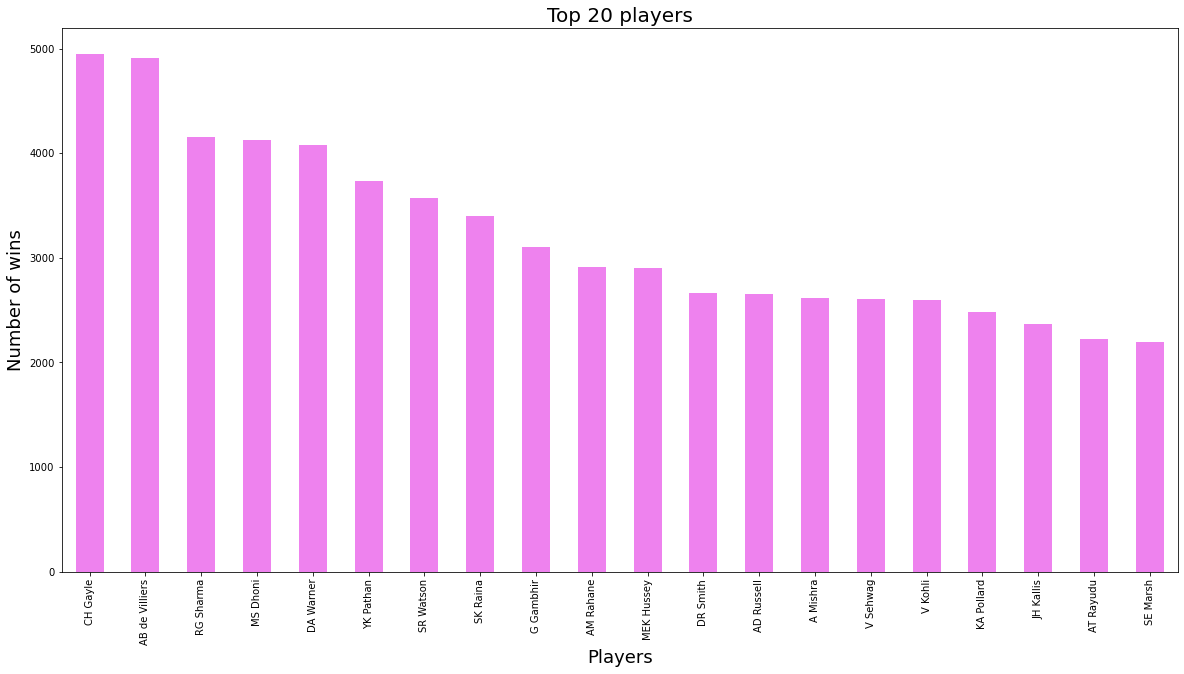

In [13]:
player_won.plot(kind = 'bar', figsize = (20,10), color = 'violet')
plt.title('Top 20 players', fontsize = 20)
plt.xlabel('Players', fontsize = 18)
plt.ylabel('Number of wins', fontsize = 18)

In [14]:
# Let's look at top 2
player_won[:2]

CH Gayle          4949
AB de Villiers    4909
Name: player_of_match, dtype: int64

As we can see that player 'CH Gayle' has most wins followed by 'AB de Villiers'

Let's see the toss ratio 

In [15]:
toss_d = data['toss_decision'].value_counts()

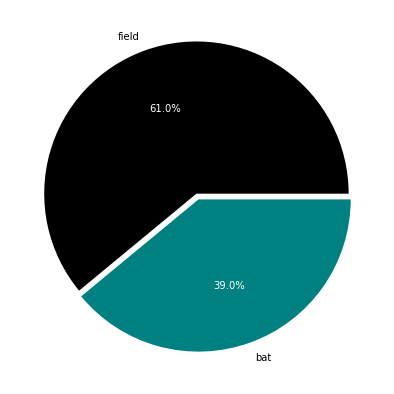

In [16]:
plt.figure(figsize = (7,7))
_,_,text = plt.pie(toss_d, labels = toss_d.index, colors = ['black', 'teal'], explode = [0.02,0.02], autopct = '%1.1f%%')
for t in text:
    t.set_color('white')
plt.show()

As we can see majority of teams choose to field first.

Text(0, 0.5, 'Toss Wins')

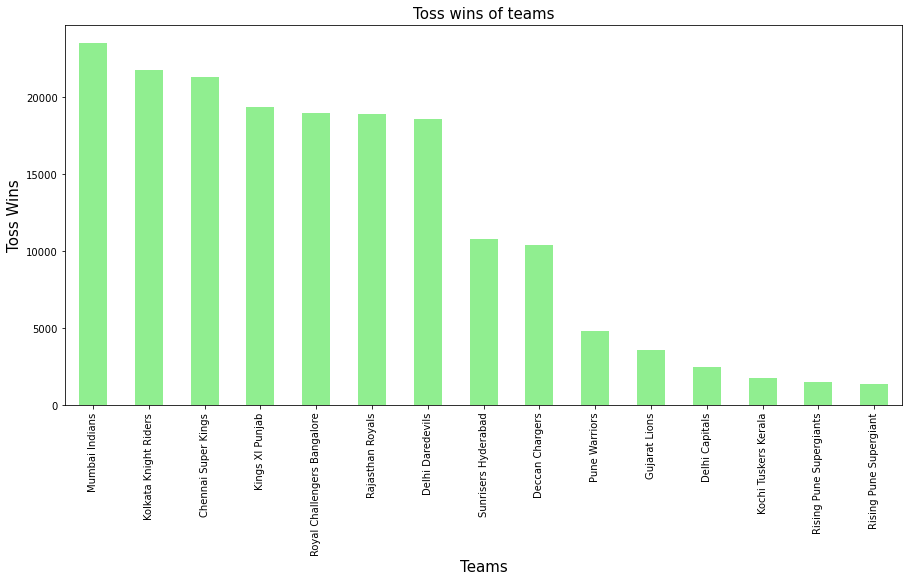

In [17]:
# Toss wins
data['toss_winner'].value_counts().plot(kind = 'bar', figsize = (15,7), color = 'lightgreen')
plt.title('Toss wins of teams', fontsize = 15)
plt.xlabel('Teams', fontsize = 15)
plt.ylabel('Toss Wins', fontsize = 15)

As we can see that 'Mumbai Indians' has won the most tosses

And 'Rising Pune Supergiant' won the least tosses

Batsman and bowler who played the most

Text(0, 0.5, 'Played')

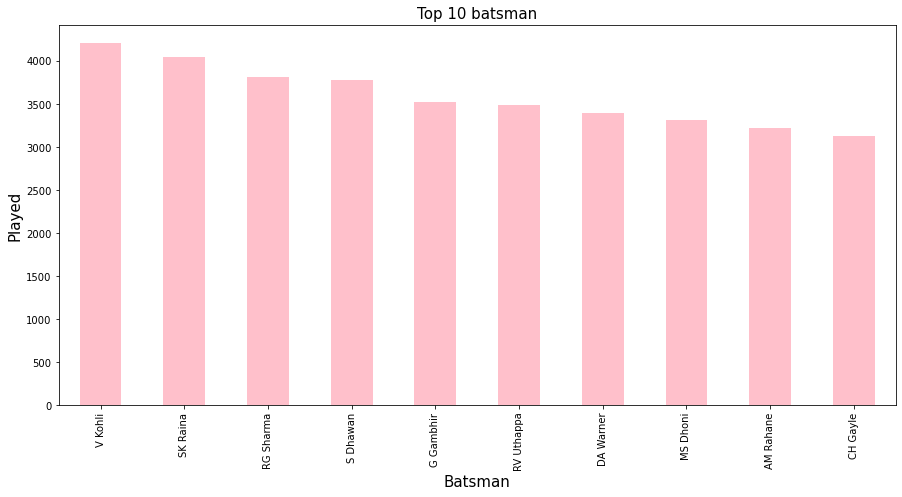

In [18]:
# Top 10 batsman
data['batsman'].value_counts().sort_values(ascending = False)[:10].plot(kind = 'bar', figsize = (15,7), color = 'pink')
plt.title('Top 10 batsman', fontsize = 15)
plt.xlabel('Batsman', fontsize = 15)
plt.ylabel('Played', fontsize = 15)

'V Kohli' has played the most matches followed by 'SK Raina'.

Text(0, 0.5, 'Played')

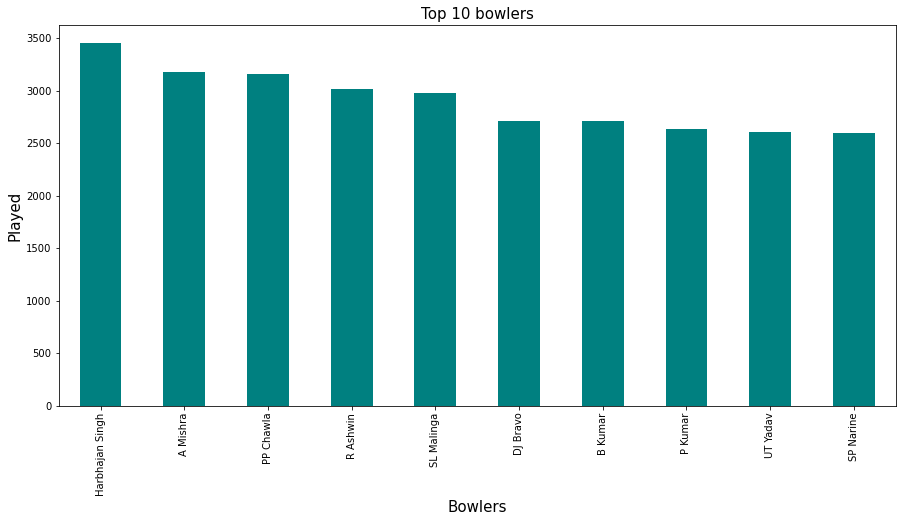

In [19]:
# Top 10 bowlers
data['bowler'].value_counts().sort_values(ascending = False)[:10].plot(kind = 'bar', figsize = (15,7), color = 'teal')
plt.title('Top 10 bowlers', fontsize = 15)
plt.xlabel('Bowlers', fontsize = 15)
plt.ylabel('Played', fontsize = 15)

'Harbhajan Singh' has played the most mayches followed by 'A Mishra'.

Venues selected for most matches

In [20]:
venue = data['venue'].value_counts()

Text(0, 0.5, 'Venue')

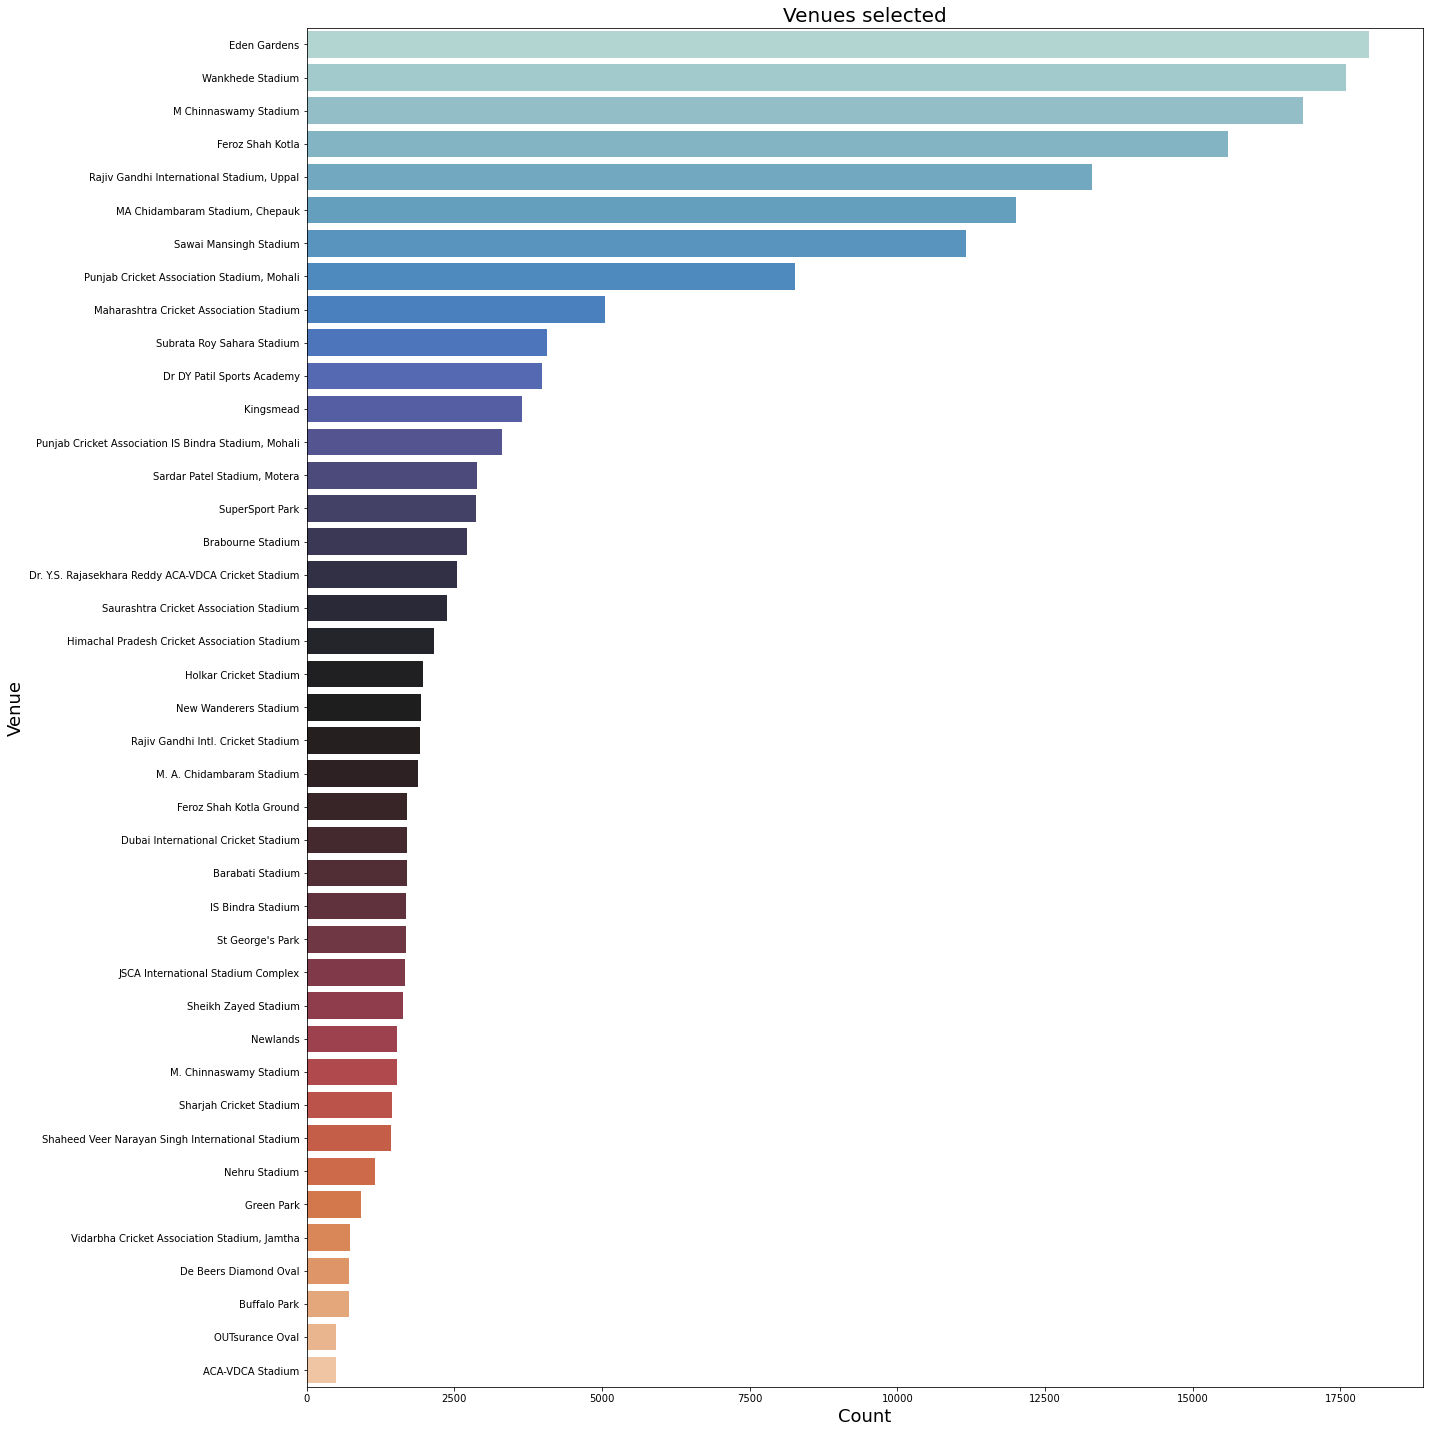

In [21]:
plt.figure(figsize = (20,25))
sns.barplot(venue, venue.index, palette = 'icefire')
plt.title('Venues selected', fontsize = 20)
plt.xlabel('Count', fontsize = 18)
plt.ylabel('Venue', fontsize = 18)

As we can see from the plot that most choosen Venue is 'Eden Gardens' followed by 'Wankhede Stadium'.

And less often played ground is 'ACA-VDCA Stadium'

Team with most runs

In [22]:
# Team with highest runs
team_run = data['batting_team'].value_counts()

Text(0, 0.5, 'Runs')

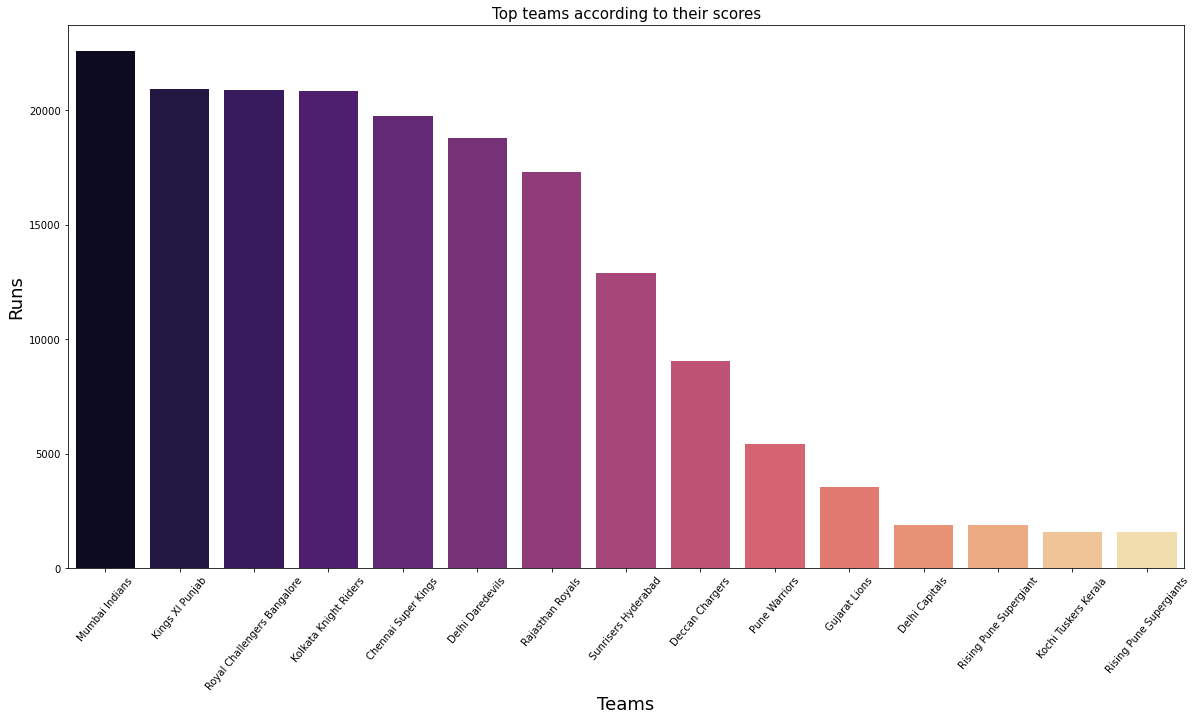

In [23]:
plt.figure(figsize = (20,10))
sns.barplot(team_run.index, team_run, palette = 'magma')
plt.xticks(rotation = 50)
plt.title('Top teams according to their scores', fontsize = 15)
plt.xlabel('Teams', fontsize = 18)
plt.ylabel('Runs', fontsize = 18)

From the above plot we can see that 'Mumbai Indians' is the top team with most runs

Let's see the ratio between winning by batting first or bowling first

In [24]:
import warnings
warnings.filterwarnings("ignore")

In [25]:
# Taking the ratio between winning by batting first or bowling first
ratio = pd.DataFrame({'win_by_wickets': data['win_by_wickets'].sum(), 'win_by_runs': data['win_by_runs'].sum()}, 
                     index = [0])

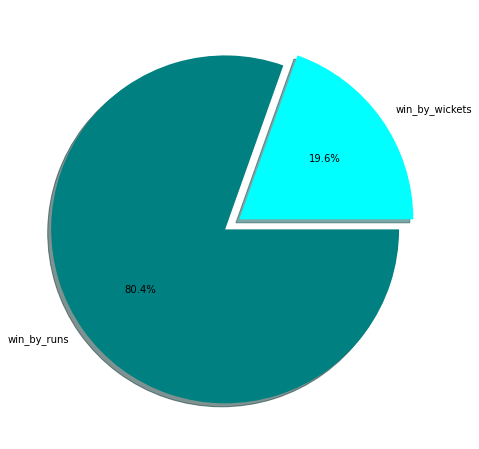

In [26]:
plt.figure(figsize=(8,8))
plt.pie(ratio, labels = ratio.keys(), autopct = '%1.1f%%', colors = ['cyan','teal'], explode = (0.05,0.05), shadow = True)
plt.show()

We can say that probability of winning is more when batting first

Matches won by batting first

Text(0, 0.5, 'Win by runs')

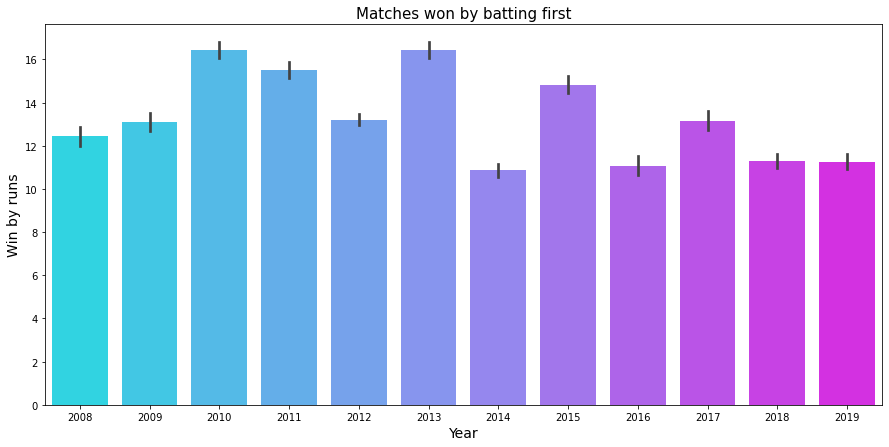

In [27]:
plt.figure(figsize = (15,7))
sns.barplot(data['season'], data['win_by_runs'], palette = 'cool')
plt.title('Matches won by batting first', fontsize = 15)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Win by runs', fontsize = 14)

We can see that in year 2010 and 2013 maximum number of matches where won by batting first.

 Matches won by fielding first

Text(0, 0.5, 'Win by wickets')

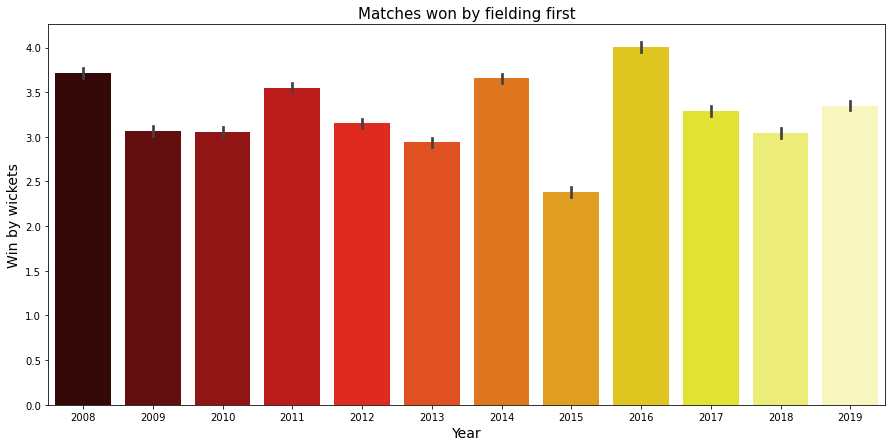

In [28]:
plt.figure(figsize = (15,7))
sns.barplot(data['season'], data['win_by_wickets'], palette = 'hot')
plt.title('Matches won by fielding first', fontsize = 15)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Win by wickets', fontsize = 14)

 We can see that in year 2016 maximum number of matches where won by feilding first.

Let's compare between winning toss and winnig the match

In [29]:
# Comparing winning match and toss vs winning match and losing toss
winToss_winMatch = (data['toss_winner'] == data['winner']).value_counts()

In [30]:
pd.DataFrame({'Win':[winToss_winMatch[1]], 'Lose': [winToss_winMatch[0]]})

,Win,Lose
0,92914,86164


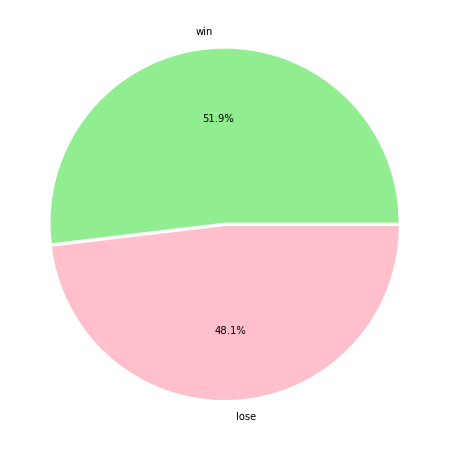

In [31]:
# Let's see the plot
plt.figure(figsize=(8,8))
plt.pie(winToss_winMatch, labels = ['win', 'lose'], colors = ['lightgreen','pink'],explode = (0.01,0.01), autopct = '%1.1f%%')
plt.show()

Teams won by batting first and bowling first and top scorers

In [32]:
# Won by Batting first
wonToss_bat = (data[data['toss_decision'] == 'bat'])
won_bat_run = wonToss_bat[wonToss_bat['win_by_runs']!=0]

In [33]:
win_r = won_bat_run['winner'].value_counts()

Text(0, 0.5, 'Team')

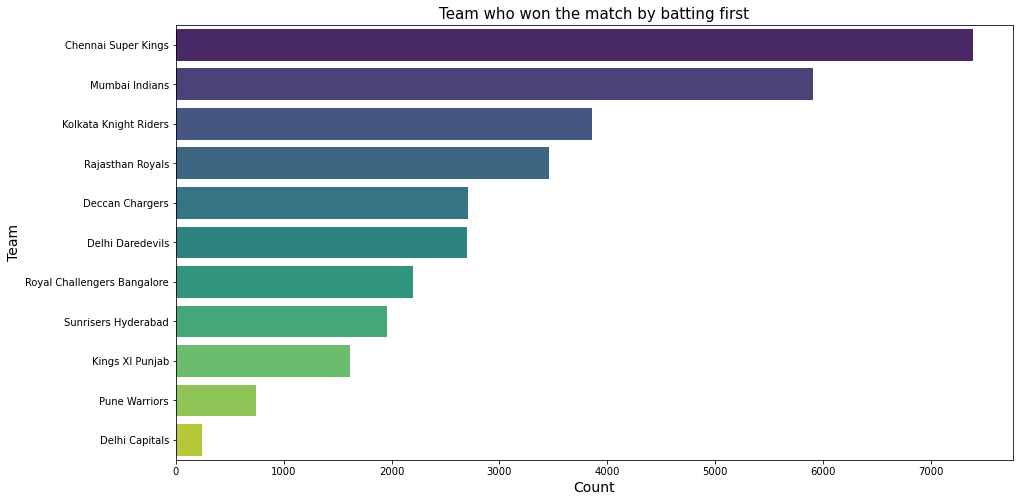

In [34]:
plt.figure(figsize=(15,8))
sns.barplot(win_r, win_r.index, palette = 'viridis')
plt.title('Team who won the match by batting first', fontsize = 15)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Team', fontsize = 14)

We can see that 'Chennai Super Kings' has won the most matches by batting first

In [35]:
# Top 10 run scorers by batting first
score_r = won_bat_run.groupby('batsman')['batsman_runs'].count().sort_values(ascending = False)[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

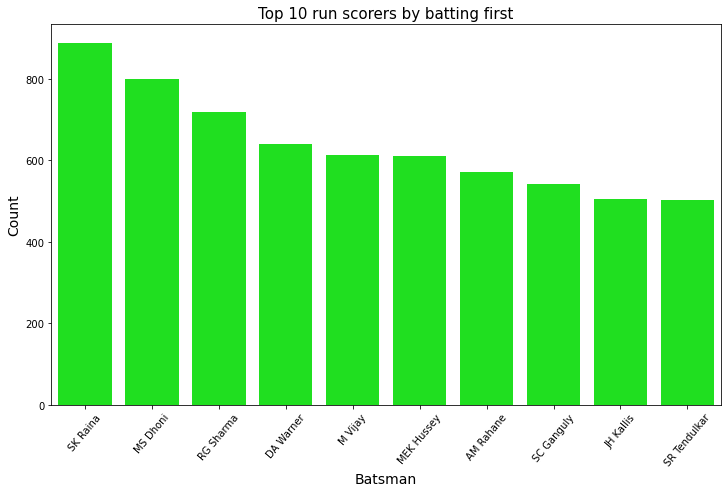

In [36]:
plt.figure(figsize=(12,7))
sns.barplot(score_r.index, score_r, color = 'lime')
plt.title('Top 10 run scorers by batting first', fontsize = 15)
plt.xlabel('Batsman', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(rotation=50)

From the above plot we can say that 'SK Raina' is the top scorer.

In [37]:
# Won by Bowling first
wonToss_field = (data[data['toss_decision'] == 'field'])
won_field_bowl = wonToss_field[wonToss_field['win_by_wickets']!=0]

In [38]:
win_b = won_field_bowl['winner'].value_counts()

Text(0, 0.5, 'Team')

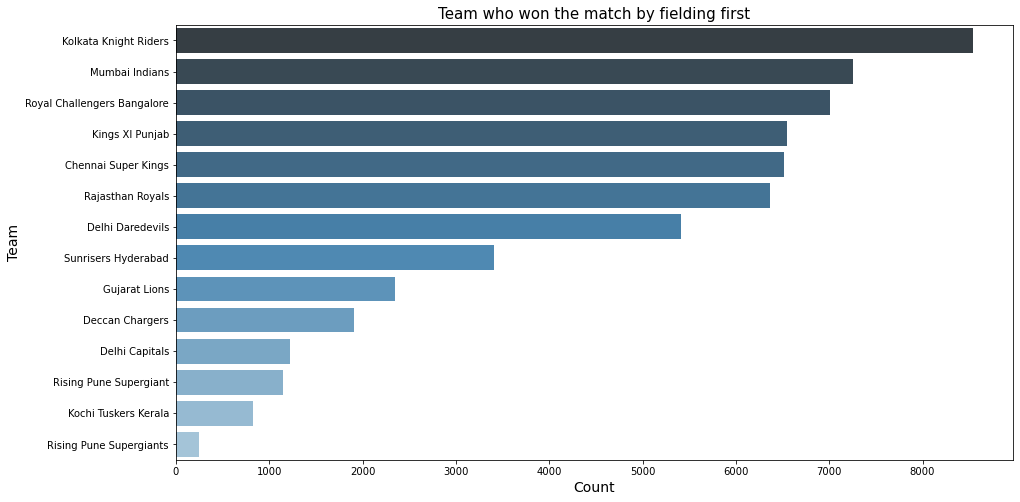

In [39]:
plt.figure(figsize=(15,8))
sns.barplot(win_b, win_b.index, palette = 'Blues_d')
plt.title('Team who won the match by fielding first', fontsize = 15)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Team', fontsize = 14)

We can see that 'Kolkkata Knight Riders' has won the most matches by fielding first

In [40]:
# Top 10 run scorers by fielding first
score_b = won_field_bowl.groupby('batsman')['batsman_runs'].count().sort_values(ascending = False)[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

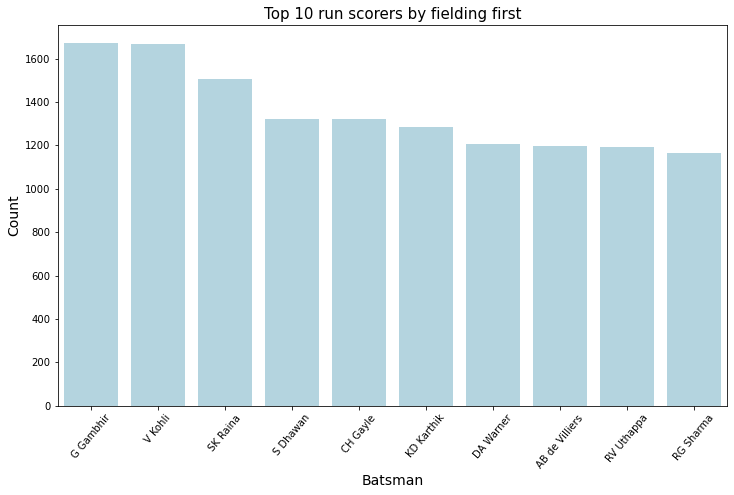

In [41]:
plt.figure(figsize=(12,7))
sns.barplot(score_b.index, score_b, color = 'lightblue')
plt.title('Top 10 run scorers by fielding first', fontsize = 15)
plt.xlabel('Batsman', fontsize = 14)
plt.ylabel('Count', fontsize = 14)
plt.xticks(rotation=50)

In [42]:
# Let's look at the values of top 2 players
score_b[:2]

batsman
G Gambhir    1670
V Kohli      1669
Name: batsman_runs, dtype: int64

We can see that 'G Gambhir' is the top scorer and closely followed by 'V Kohli'.

Let's find out the players with most sixes and fours

In [43]:
# Most sixes
six = data[data['batsman_runs'] == 6]
six_name = six[['batsman', 'batsman_runs']]

In [44]:
# Let's look at top 10 players
six_scorer = six_name['batsman'].value_counts().sort_values(ascending=False)[:10]
six_scorer[:5]  # Top 5

CH Gayle          327
AB de Villiers    214
MS Dhoni          207
SK Raina          195
RG Sharma         194
Name: batsman, dtype: int64

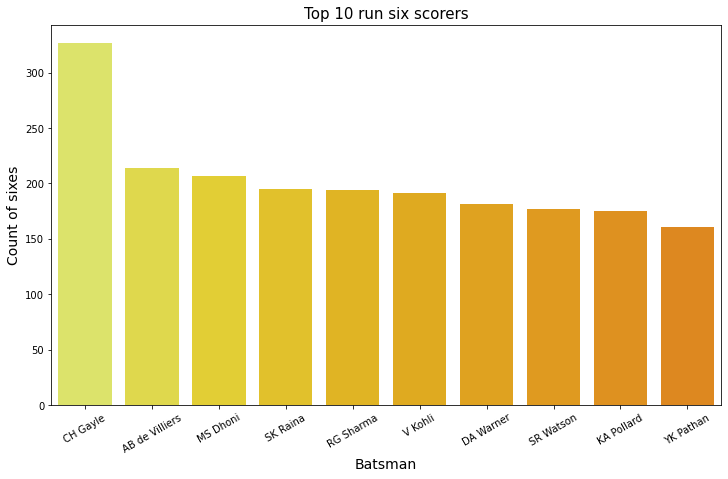

In [45]:
#Let's plot a graph
plt.figure(figsize=(12,7))
sns.barplot(six_scorer.index, six_scorer, palette = 'Wistia')
plt.title('Top 10 run six scorers', fontsize = 15)
plt.xlabel('Batsman', fontsize = 14)
plt.ylabel('Count of sixes', fontsize = 14)
plt.xticks(rotation=30)
plt.show()

 From the above plot we can say that 'CH Gayle' has hit the most sixes in the entire ipl league

In [46]:
# Most foures
four = data[data['batsman_runs'] == 4]
four_name = four[['batsman', 'batsman_runs']]

In [47]:
# Let's look at top 10 players
four_scorer = four_name['batsman'].value_counts().sort_values(ascending=False)[:10]
four_scorer[:5]  # Top 5

S Dhawan     526
SK Raina     495
G Gambhir    492
V Kohli      482
DA Warner    459
Name: batsman, dtype: int64

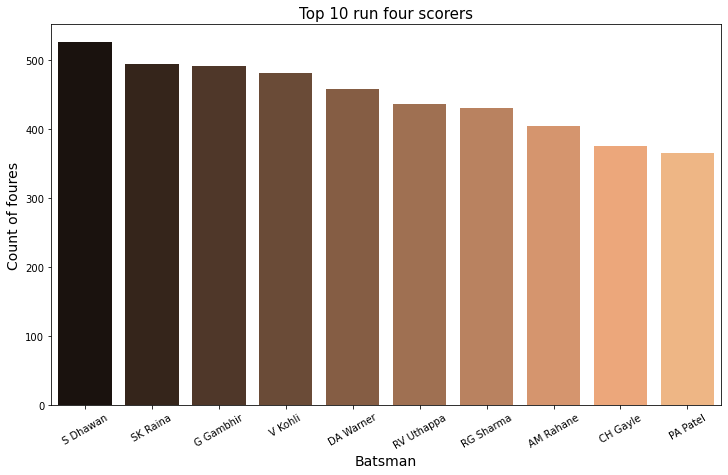

In [48]:
#Let's plot a graph
plt.figure(figsize=(12,7))
sns.barplot(four_scorer.index, four_scorer, palette = 'copper')
plt.title('Top 10 run four scorers', fontsize = 15)
plt.xlabel('Batsman', fontsize = 14)
plt.ylabel('Count of foures', fontsize = 14)
plt.xticks(rotation=30)
plt.show()

From the above plot we can say that 'S Dhawan' has hit the most foures in the entire ipl league

Winners of each seasons

In [49]:
# Taking last match of each season
win = data[['season', 'winner']].groupby('season')
season_win = win.tail(1).sort_values('season').reset_index(drop=True)

In [50]:
season_win

,season,winner
0,2008,Rajasthan Royals
1,2009,Deccan Chargers
2,2010,Chennai Super Kings
3,2011,Chennai Super Kings
4,2012,Kolkata Knight Riders
5,2013,Mumbai Indians
6,2014,Kolkata Knight Riders
7,2015,Mumbai Indians
8,2016,Sunrisers Hyderabad
9,2017,Mumbai Indians


In [51]:
win_count = season_win['winner'].value_counts()
win_count

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Rajasthan Royals         1
Deccan Chargers          1
Name: winner, dtype: int64

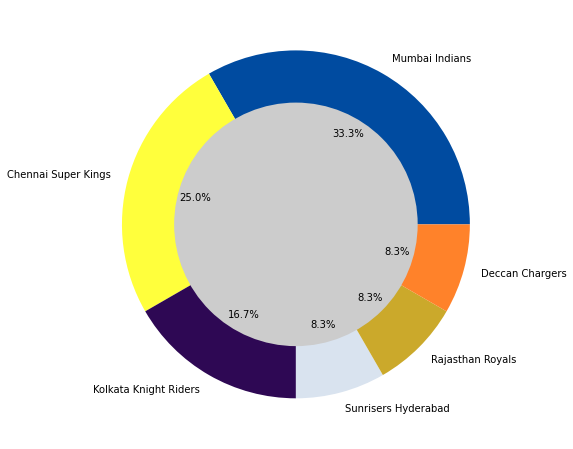

In [52]:
# Let's plot and see
plt.figure(figsize=(8,8))
color = ['#004ba0','#ffff3c','#2e0854', '#d9e3ef', '#cba92b', '#ff822a']
plt.pie(win_count, labels = win_count.index, autopct = '%1.1f%%', colors = color)
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0,0), 0.70, fc = '#cccccc'))

We can see that 'Mumbai Indians' has won most seasons(i.e, 4 seasons) followed by 'Chennai Super Kings' with 3 season wins

Top batsman in IPL

In [53]:
# Top 10 batsman
batsman = data.groupby('batsman')['batsman_runs'].count().sort_values(ascending = False)[:10]

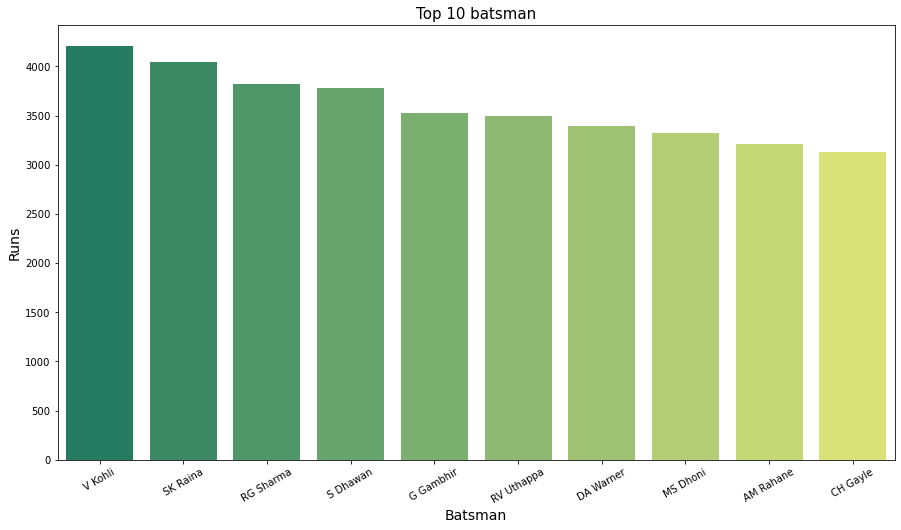

In [54]:
#Let's plot a graph
plt.figure(figsize=(15,8))
sns.barplot(batsman.index, batsman, palette = 'summer')
plt.title('Top 10 batsman', fontsize = 15)
plt.xlabel('Batsman', fontsize = 14)
plt.ylabel('Runs', fontsize = 14)
plt.xticks(rotation=30)
plt.show()

We can see that 'V Kohli' has scored the most runs followed by 'SK Raina'.

Top bowlers in IPL

In [55]:
# Top 10 bowler
bowler = data.groupby('bowler')['dismissal_kind'].count().sort_values(ascending = False)[:10]

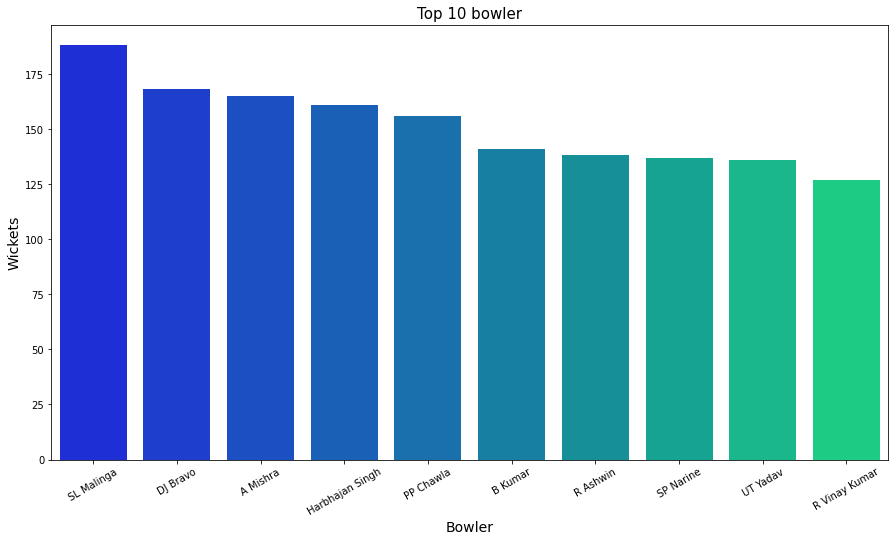

In [56]:
#Let's plot a graph
plt.figure(figsize=(15,8))
sns.barplot(bowler.index, bowler, palette = 'winter')
plt.title('Top 10 bowler', fontsize = 15)
plt.xlabel('Bowler', fontsize = 14)
plt.ylabel('Wickets', fontsize = 14)
plt.xticks(rotation=30)
plt.show()

We can see that 'SL Malinga' is the top bowler with highest wickets in IPL.

Diffrent types of runs scored

In [57]:
# Types of runs scored
run_type = data[['wide_runs', 'legbye_runs', 'bye_runs', 'noball_runs', 'penalty_runs']].sum()

In [58]:
print(run_type.reset_index(name='sum'))
print('\n :> Extra runs: ',data['extra_runs'].sum())
print('\n--> Total runs(with batsman runs): ',data['total_runs'].sum())

          index   sum
0     wide_runs  6576
1   legbye_runs  3785
2      bye_runs   884
3   noball_runs   749
4  penalty_runs    10

 :> Extra runs:  12004

--> Total runs(with batsman runs):  235290


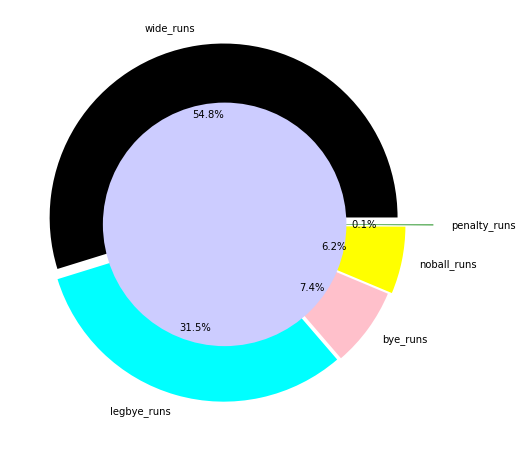

In [59]:
# Let's plot and see
plt.figure(figsize=(8,8))
color = ['black', 'cyan', 'pink', 'yellow', 'green']
plt.pie(run_type, labels = run_type.index, autopct = '%1.1f%%', colors = color, explode = (0.04,0.02,0.02,0.04,0.2))
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0,0), 0.70, fc = '#ccccff'))

We can see that maximum extra run is scored by 'wide runs' and followed by 'legbye runs'.

Types of dismissal

In [60]:
out = data['dismissal_kind'].value_counts()

Text(0, 0.5, 'Dismissal type')

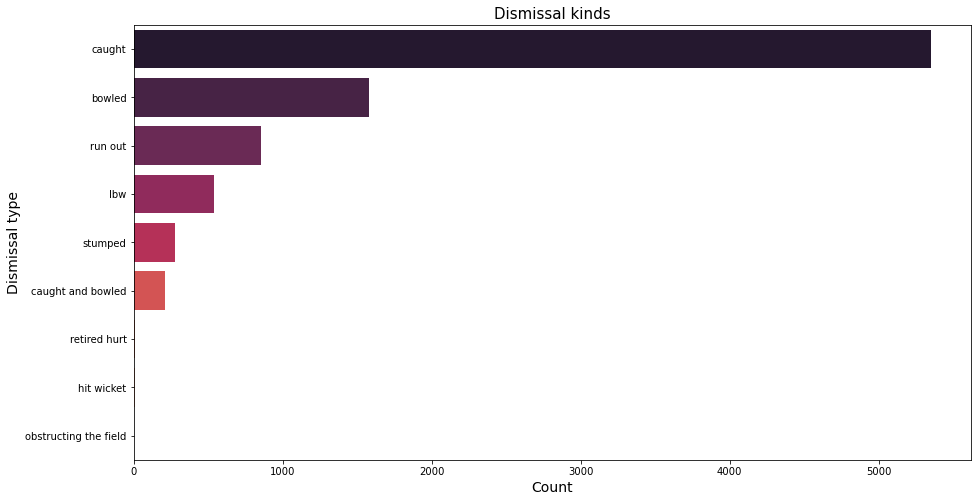

In [61]:
plt.figure(figsize=(15,8))
sns.barplot(out, out.index, palette = 'rocket')
plt.title('Dismissal kinds', fontsize = 15)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Dismissal type', fontsize = 14)

As we can see thay most common dismissal type is 'caught'(catch)

Match Results 

In [62]:
pd.DataFrame({'Count': data['result'].value_counts()})

,Count
normal,176372
tie,2334
no result,372


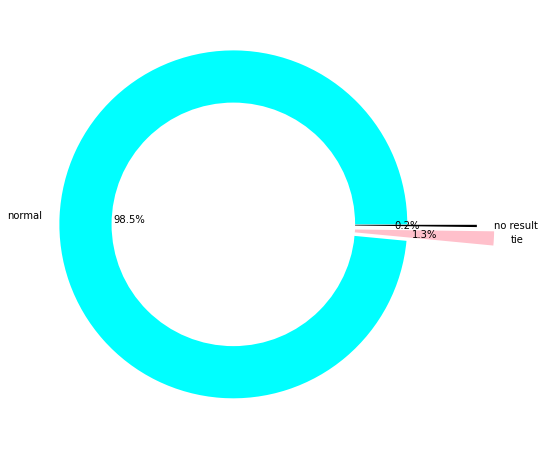

In [63]:
# Let's plot
plt.figure(figsize=(8,8))
plt.pie(data['result'].value_counts(), labels = data['result'].value_counts().index, colors = ['cyan','pink','black'],
        explode = (0, 0.5, 0.4), autopct = '%1.1f%%')
fig = plt.gcf()
fig.gca().add_artist(plt.Circle((0,0), 0.70, fc = 'white'))

98.5% of matches where normal(i.e, produced clear results) and 1.3% of matches ended as tie and rest 0.2% produced no result

***

## Conclusion:

Results after analyzing the IPL dataset:

Final Conclusion:
1. Most successful Team: 'Mumbai Indians'
2. Most successful Players batting: 'CH Gayle' and 'V Kohli'
3. Most successful Player bowling: 'SL Malinga'

4. Factors contributing win or loss of a team: Winning a toss, Venue and extra runs scored(wide runs, noballs, etc)

5. Suggested Team a company can endorse for it's products: 'Mumbai Indians'
6. Suggested Player a company can endorse for it's products: 'V Kohli'

***

Thank You:)